In [77]:
library(pixmap)
library(ppls)

########### Utils
##### reconstruction of v in image space
##### 
ith.eigenface.for.image.v <- function(i, v, e.faces) {
    v.centered <- as.vector(v - mean.face.v)
    coef <- v.centered %*% as.vector(e.faces[, i])
    v <- as.vector(e.faces[, i])
    c(coef) * v
}
# generate cumsum of projections onto eigenfaces
cumsum.eigenfaces <- function(top.eigenfaces) {
  top.eigenfaces.cum <- top.eigenfaces # copy
  # seq_along=length
  for (i in seq_along(top.eigenfaces.cum)) {
    sum <- mean.face.v
    for (j in c(1:i)) {
      sum <- sum + top.eigenfaces[[j]]
    }
    top.eigenfaces.cum[[i]] <- sum
  }
  top.eigenfaces.cum
}

# plotting a row image
plot.row.v <- function(row.v, str = "") {
  # all the images are this size, just set the height (nrow), auto convert to the width (ncol)
  m <- matrix(row.v, nrow = 192) 
  pix <- pixmapGrey(cellres=1, m)
  plot(pix, main = str)
}

In [55]:
# read data, about 57MB
data <- read.csv(paste("image_matrix2.csv", sep = ""), header = F)

In [56]:
# infor of the data
print("Data dimension: ")
print("Each feature is a pixel in an image, each row is an image of a person")
print(dim(data))

[1] "Data dimension: "
[1] "Each feature is a pixel in an image, each row is an image of a person"
[1]   148 32256


In [57]:
image.matrix <- matrix(unlist(data), nrow = nrow(data), ncol = ncol(data))
mean.face.v <- as.vector(apply(image.matrix, 2, mean))
image.m.centered <- t(apply(image.matrix, 1, function(row) { row - mean.face.v }))
X <- t(image.m.centered)

In [58]:
length(as.vector(apply(image.matrix, 2, mean)))

[1] 32256

In [59]:
########### PCA
# prcomp way:
pca <- prcomp(X, center = F)
pca.x.norm <- apply(pca$x, 2, normalize.vector)


In [60]:
#### analysis result
library(factoextra)

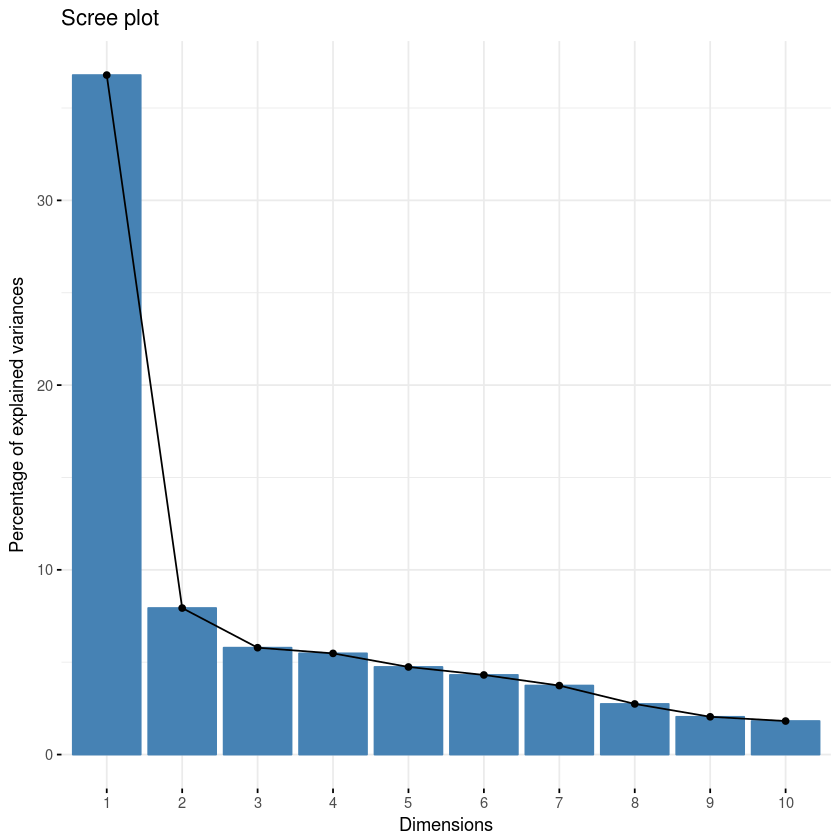

In [61]:
# visualize eigenvalues. show the percentage of variances explained by each principal component.
fviz_eig(pca)

In [62]:
########### do it by step way:
XTX <- t(X) %*% X # missing the 1 / n - 1 for cov matrix b/c we normalize later anyway
eigen <- eigen(XTX)
eigenvectors.XTX.col <- eigen$vectors
### this is equivalent to:
eigenvectors.XTX.col.copy <- -1 * svd(X)$v

principal.component.scores <- apply(eigenvectors.XTX.col, 2, function(c) {
  normalize.vector(X %*% matrix(c, ncol = 1))
}) # same as: X %*% t(eigenvectors.XTX.col) but with normalization

In [63]:
##### test either method's principle component scores:
# run one of these lines:
# eigenfaces.as.cols <- pca.x.norm # tests prcomp way
eigenfaces.as.cols <- principal.component.scores


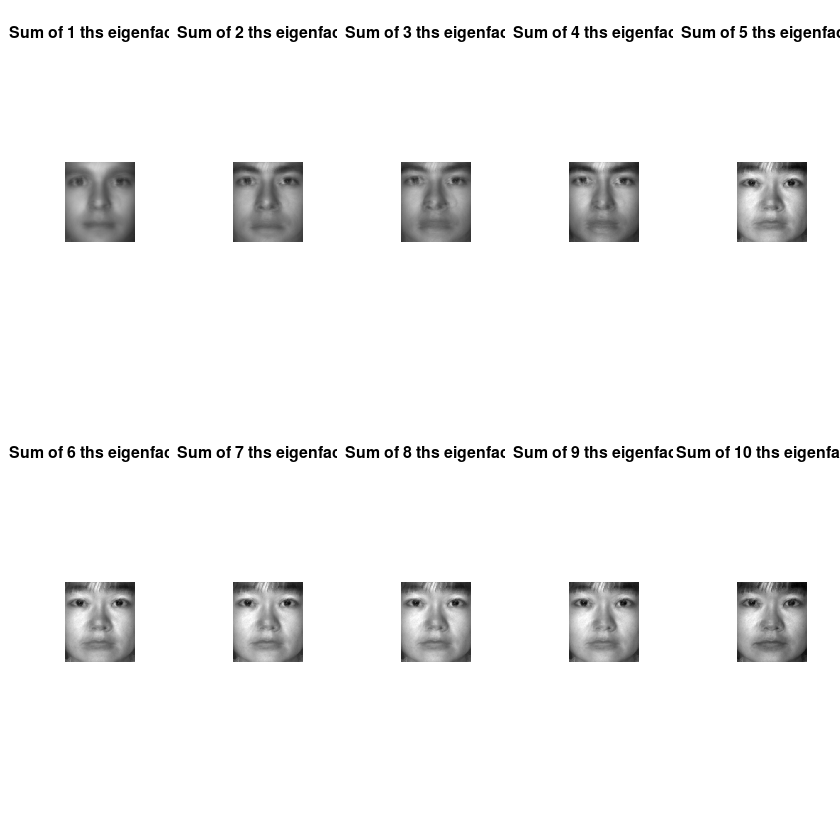

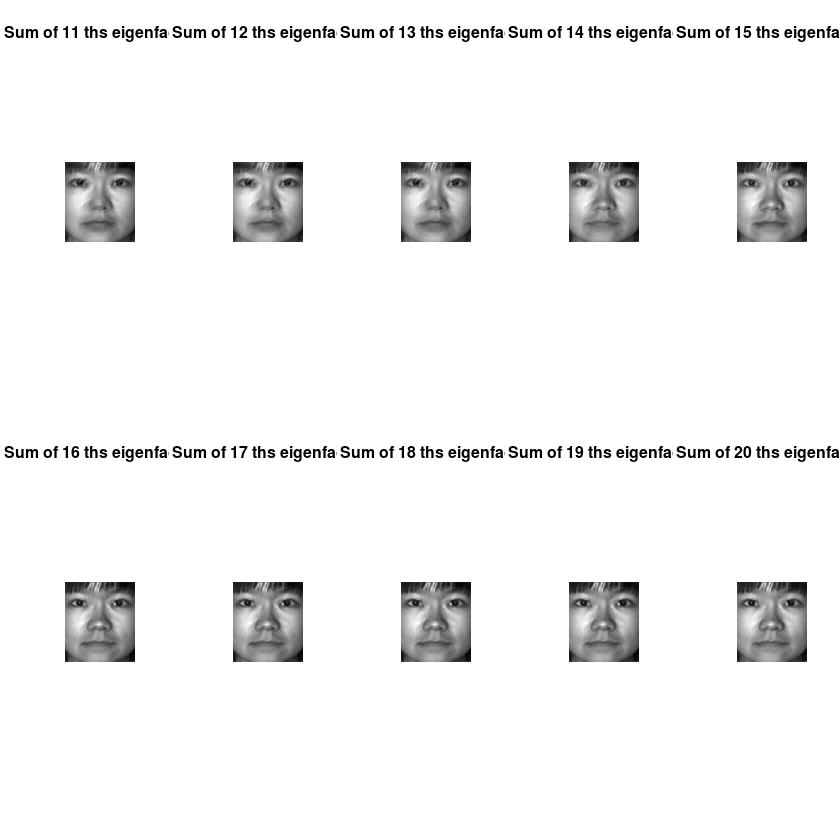

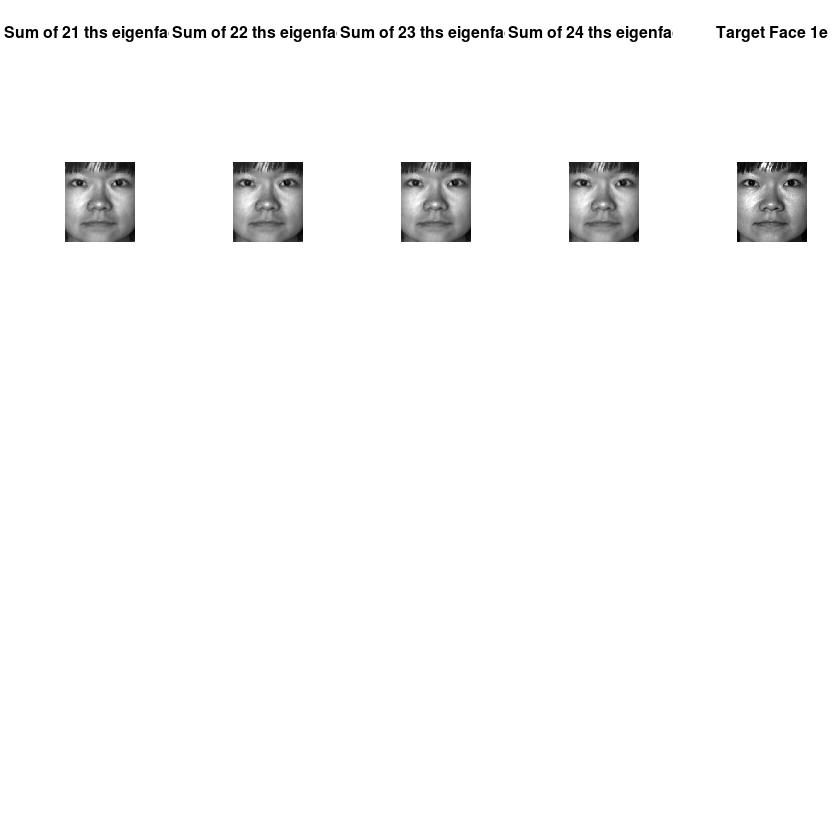

In [78]:
#### Then run the rest

# goal image - plotted later:
to.reconstruct.file <- "yaleB05_P00A+010E+00.pbm"
to.reconstruct.v <- as.vector(getChannels(read.pnm(cellres=1, to.reconstruct.file)))

top.eigenfaces <- lapply(c(1:24), function(i) { ith.eigenface.for.image.v(i, to.reconstruct.v, eigenfaces.as.cols) })
top.eigenfaces.cum <- cumsum.eigenfaces(top.eigenfaces)

# finally, plotting the evidence
par(mfrow = c(2,5))
for (i in seq_along(top.eigenfaces.cum)) {
  plot.row.v(top.eigenfaces.cum[[i]], paste("Sum of", i, "ths eigenfaces"))
}
plot.row.v(to.reconstruct.v, "Target Face 1e")

NULL